In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 1.Tạo DataFrame df chứa danh sách các sinh viên khoa CN, khoa TO và khoa VL. Các danh sách này được đọc từ các tập tin sinh_vien_CN.csv, sinh_vien_TO.csv và sinh_vien_VL.csv 
df_CN = pd.read_csv('data/sinh_vien_CN.csv')
df_TO = pd.read_csv('data/sinh_vien_TO.csv')
df_VL = pd.read_csv('data/sinh_vien_VL.csv')
df = pd.concat([df_CN, df_TO, df_VL], ignore_index = True)

In [4]:
# 2.Hiển thị thông tin chung của dữ liệu: head, tail, info, số dòng, số cột của dữ liệu
df.head()

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh
0,C0001,Khương Thảo,Loan,False,1999-01-04 00:00:00,ktloan@gmail.com,987314518,586900775484,2000000,CN
1,C0002,Đặng Bạch,Ngọc,True,1999-11-11 00:00:00,dbngoc@gmail.com,987587327,274387352269,0,CN
2,C0003,Phạm Văn Minh,Thiện,True,1999-11-23 00:00:00,pvmthien@gmail.com,987858734,835772714136,0,CN
3,C0004,Đinh Thị Thanh,Dung,False,1999-01-19 00:00:00,dttdung@gmail.com,987508413,373064334392,1000000,CN
4,C0005,Trần Mạnh,Thiện,True,1999-08-19 00:00:00,tmthien@gmail.com,987579776,233384596844,1000000,CN


In [5]:
df.tail()

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh
995,V0996,Trần Mạnh,Thăng,True,1999-06-21 00:00:00,tmthang@gmail.com,987250062,768656897616,2000000,VL
996,V0997,Trần Vĩnh,Thiện,True,1999-07-23 00:00:00,tvthien@gmail.com,987716502,468267857113,3000000,VL
997,V0998,Khương Thảo,Hạnh,False,1999-08-16 00:00:00,kthanh@gmail.com,913696608,702859343545,0,VL
998,V0999,Đinh Ngọc,Ngọc,True,1999-05-25 00:00:00,dnngoc@gmail.com,913689521,187831202224,3000000,VL
999,V1000,Lý Mạnh,Bảo,True,1999-06-03 00:00:00,lmbao@gmail.com,987656186,865173188581,0,VL


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   masv      1000 non-null   object
 1   ho        1000 non-null   object
 2   ten       1000 non-null   object
 3   gioitinh  1000 non-null   bool  
 4   ngaysinh  1000 non-null   object
 5   email     1000 non-null   object
 6   didong    1000 non-null   int64 
 7   cmnd      1000 non-null   int64 
 8   hocbong   1000 non-null   int64 
 9   makh      1000 non-null   object
dtypes: bool(1), int64(3), object(6)
memory usage: 71.4+ KB


In [7]:
print('Số dòng: ', df.shape[0])
print('Số cột: ', df.shape[1])

Số dòng:  1000
Số cột:  10


In [8]:
# 3.Tạo DataFrame df_ket_qua từ tập tin ket_qua.csv
df_ket_qua = pd.read_csv('data/ket_qua.csv')
df_ket_qua.head()

,masv,mamh,diem
0,C0001,CSD1,7.0
1,C0001,CSD2,6.0
2,C0001,CTDL,9.0
3,C0001,KTLT,5.5
4,C0001,LQL1,7.0


In [9]:
# 4.Tạo DataFrame df_dtb bằng cách nhóm df_ket_qua theo masv và tính điểm trung bình cho mỗi sinh viên
df_dtb = df_ket_qua.groupby('masv', as_index=False).diem.mean()
df_dtb.head()

,masv,diem
0,C0001,6.5
1,C0002,7.2
2,C0003,7.7
3,C0004,6.9
4,C0005,7.7


In [10]:
# Trộn df và df_dtb theo masv 
df = df.merge(df_dtb)
df.head()

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem
0,C0001,Khương Thảo,Loan,False,1999-01-04 00:00:00,ktloan@gmail.com,987314518,586900775484,2000000,CN,6.5
1,C0002,Đặng Bạch,Ngọc,True,1999-11-11 00:00:00,dbngoc@gmail.com,987587327,274387352269,0,CN,7.2
2,C0003,Phạm Văn Minh,Thiện,True,1999-11-23 00:00:00,pvmthien@gmail.com,987858734,835772714136,0,CN,7.7
3,C0004,Đinh Thị Thanh,Dung,False,1999-01-19 00:00:00,dttdung@gmail.com,987508413,373064334392,1000000,CN,6.9
4,C0005,Trần Mạnh,Thiện,True,1999-08-19 00:00:00,tmthien@gmail.com,987579776,233384596844,1000000,CN,7.7


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   masv      1000 non-null   object 
 1   ho        1000 non-null   object 
 2   ten       1000 non-null   object 
 3   gioitinh  1000 non-null   bool   
 4   ngaysinh  1000 non-null   object 
 5   email     1000 non-null   object 
 6   didong    1000 non-null   int64  
 7   cmnd      1000 non-null   int64  
 8   hocbong   1000 non-null   int64  
 9   makh      1000 non-null   object 
 10  diem      1000 non-null   float64
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 86.9+ KB


In [12]:
# 6. Cho biết 5 sinh viên có điểm lớn nhất của mỗi khoa, sắp tăng theo mã khoa và giảm theo điểm

In [13]:
CN_5_max = df[df.makh == 'CN'].sort_values(by = 'diem', ascending = False).head()

In [14]:
TO_5_max = df[df.makh == 'TO'].sort_values(by = 'diem', ascending = False).head()

In [15]:
VL_5_max = df[df.makh == 'VL'].sort_values(by = 'diem', ascending = False).head()

In [16]:
CN_TO_VL_max = pd.concat([CN_5_max, TO_5_max, VL_5_max], ignore_index= True).sort_values(by = ['makh', 'diem'], ascending=[True, False])

In [17]:
CN_TO_VL_max

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem
0,C0355,Văn Thị,Mai,False,1999-11-10 00:00:00,vtmai@gmail.com,987327541,855354458643,0,CN,8.75
1,C0387,Lê Bạch,Ngân,False,1999-04-29 00:00:00,lbngan@gmail.com,913158437,647119351103,0,CN,8.70
2,C0483,Lý Vĩnh,Thiệu,True,1999-06-21 00:00:00,lvthieu@gmail.com,913453657,432742077115,0,CN,8.70
3,C0154,Cao Văn Minh,Bảo,True,1999-05-11 00:00:00,cvmbao@gmail.com,913598140,530460808272,3000000,CN,8.60
4,C0052,Lê Thị Thảo,Ly,False,1999-02-14 00:00:00,lttly@gmail.com,168434476,874368763621,1000000,CN,8.55
5,T0508,Trần Thị Thảo,Nhung,False,1999-11-10 00:00:00,tttnhung@gmail.com,987228466,988514148472,1000000,TO,8.35
6,T0537,Văn Văn,Vỹ,True,1999-09-22 00:00:00,vvvy@gmail.com,913735282,876167216537,2000000,TO,8.25
7,T0584,Đàm Bạch,Ngân,True,1999-04-28 00:00:00,dbngan@gmail.com,168535534,165541702107,0,TO,8.25
8,T0513,Thái Văn Minh,Kiệt,True,1999-04-19 00:00:00,tvmkiet@gmail.com,913922643,753805518894,3000000,TO,8.20
9,T0557,Phạm Thị Thanh,Hoa,False,1999-07-18 00:00:00,ptthoa@gmail.com,913171650,396663865661,1000000,TO,8.15


In [18]:
"""
7. Trong DataFrame df tạo thêm cột ketqua với kết quả là giỏi nếu điểm>=9, kết quả là khá nếu điểm<9 và điểm >=6.5, 
kết quả là trung bình nếu điểm <6.5 và điểm >=5, kết quả là yếu nếu điểm<5 
"""
df['ketqua'] = df.diem.apply(lambda x: 'giỏi' if x>=9 else 'khá' if x >=6.5 else 'trung bình' if x>=5 else 'yếu')

In [19]:
df.head()

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem,ketqua
0,C0001,Khương Thảo,Loan,False,1999-01-04 00:00:00,ktloan@gmail.com,987314518,586900775484,2000000,CN,6.5,khá
1,C0002,Đặng Bạch,Ngọc,True,1999-11-11 00:00:00,dbngoc@gmail.com,987587327,274387352269,0,CN,7.2,khá
2,C0003,Phạm Văn Minh,Thiện,True,1999-11-23 00:00:00,pvmthien@gmail.com,987858734,835772714136,0,CN,7.7,khá
3,C0004,Đinh Thị Thanh,Dung,False,1999-01-19 00:00:00,dttdung@gmail.com,987508413,373064334392,1000000,CN,6.9,khá
4,C0005,Trần Mạnh,Thiện,True,1999-08-19 00:00:00,tmthien@gmail.com,987579776,233384596844,1000000,CN,7.7,khá


In [20]:
# 8. Tạo bảng tính điểm trung bình của mỗi khoa 
pd.pivot_table(data = df, index = 'makh', columns = 'ketqua', values = 'diem', aggfunc = 'mean')

ketqua,khá,trung bình
makh,,
CN,7.311874,6.176829
TO,7.360638,6.333333
VL,7.302095,6.210714


In [21]:
pd.crosstab(index = df.makh, columns = df.ketqua, values = df.diem, aggfunc = 'mean')

ketqua,khá,trung bình
makh,,
CN,7.311874,6.176829
TO,7.360638,6.333333
VL,7.302095,6.210714


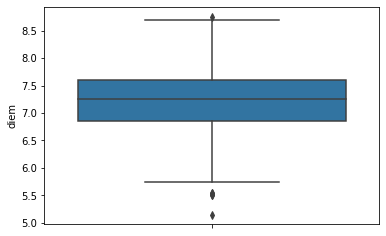

In [22]:
# 9. Vẽ biểu đồ boxplot với dữ liệu là DataFrame df. Chép các outlier ra df_outliers 
sns.boxplot(y = df.diem);

In [23]:
Q1 = df.diem.quantile(0.25)
Q3 = df.diem.quantile(0.75)
IQR = Q3 - Q1
chan_tren = Q3 + 1.5*IQR
chan_duoi = Q1 - 1.5*IQR

In [24]:
df_outliers = df[(df.diem < chan_duoi) | (df.diem > chan_tren)]
df_outliers

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem,ketqua
244,C0245,Cao Minh,Thu,False,1999-11-20 00:00:00,cmthu@gmail.com,913165000,776823107760,3000000,CN,5.55,trung bình
245,C0246,Lý Văn Minh,Huy,True,1999-06-16 00:00:00,lvmhuy@gmail.com,168415361,578635737915,1000000,CN,5.50,trung bình
354,C0355,Văn Thị,Mai,False,1999-11-10 00:00:00,vtmai@gmail.com,987327541,855354458643,0,CN,8.75,khá
620,V0621,Vương Thị Thanh,Thúy,False,1999-08-12 00:00:00,vttthuy@gmail.com,987668123,752985556125,1000000,VL,5.50,trung bình
832,V0833,Trần Phú,Minh,False,1999-05-24 00:00:00,tpminh@gmail.com,168861731,190672558617,2000000,VL,5.15,trung bình
938,V0939,Cao Nam,Phong,True,1999-11-23 00:00:00,cnphong@gmail.com,168121214,419940564175,1000000,VL,5.55,trung bình


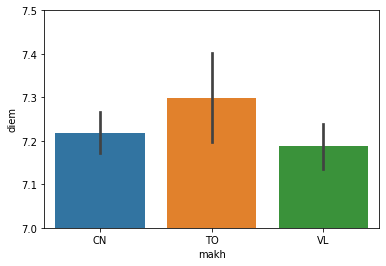

In [25]:
# 10. Vẽ biểu đồ barplot thể hiện điểm trung bình mỗi khoa 
plt.ylim(7.0, 7.5)
sns.barplot(x = 'makh', y = 'diem', data = df);

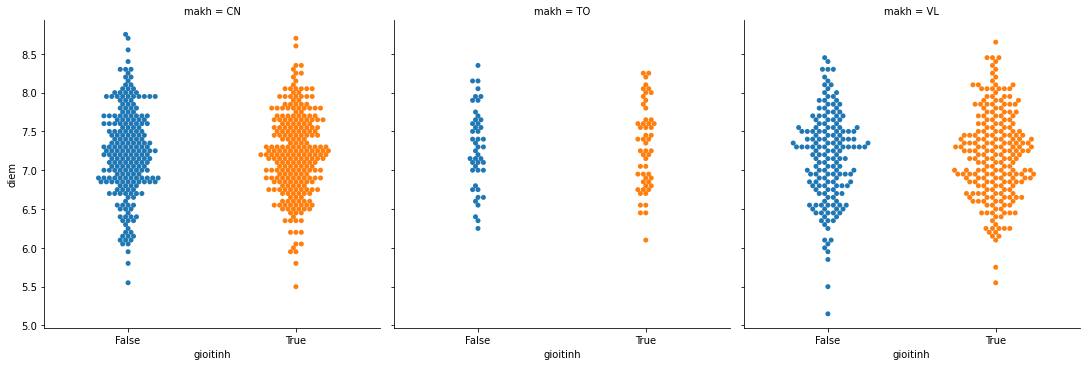

In [26]:
# 11. Vẽ biểu đồ thể hiện điểm số của sinh viên mỗi khoa theo giới tính  
sns.catplot(x="gioitinh", y="diem", col="makh", data=df, kind = 'swarm');

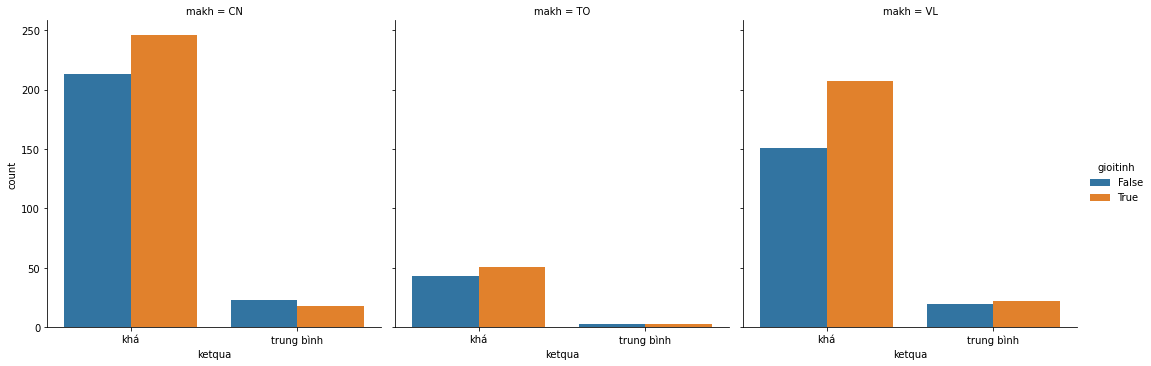

In [27]:
# 12. Vẽ biểu đồ đếm số sinh viên theo nhóm kết quả và giới tính của mỗi khoa 
sns.catplot(data = df, x = 'ketqua', kind = 'count', col = 'makh', hue = 'gioitinh');

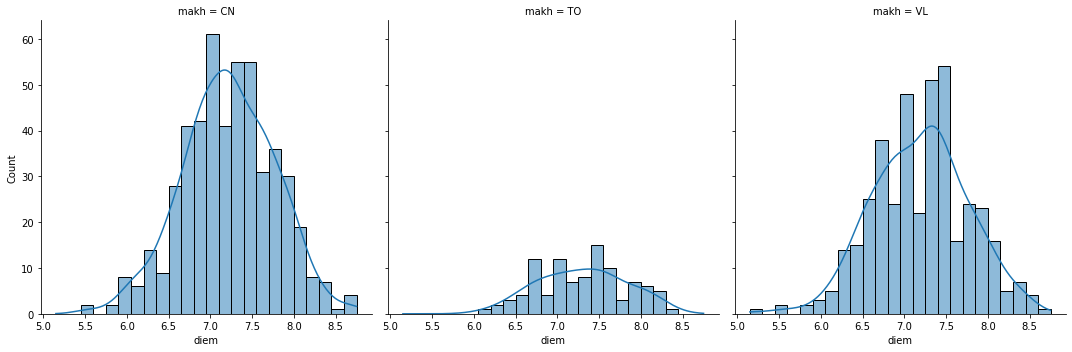

In [28]:
# 13. Vẽ biểu đồ phân bố điểm của mỗi khoa
sns.displot(data = df, x = 'diem', kde = True, col = 'makh');

In [29]:
#14. Lấy ngẫu nhiên 10 sinh viên của khoa CN (random_state = 0) rồi vẽ biểu đồ thể hiện sinh viên có điểm cao nhất, thấp nhất
sample = df[df.makh == 'CN'].sample(n = 10, random_state = 0).sort_values(by = 'diem', ascending = False)
sample['hoten'] = sample.ho +" "+sample.ten
sample

,masv,ho,ten,gioitinh,ngaysinh,email,didong,cmnd,hocbong,makh,diem,ketqua,hoten
153,C0154,Cao Văn Minh,Bảo,True,1999-05-11 00:00:00,cvmbao@gmail.com,913598140,530460808272,3000000,CN,8.60,khá,Cao Văn Minh Bảo
159,C0160,Phạm Thảo,Mai,False,1999-12-19 00:00:00,ptmai@gmail.com,987316732,791319761675,0,CN,8.25,khá,Phạm Thảo Mai
90,C0091,Nguyễn Thảo,Ly,False,1999-11-07 00:00:00,ntly@gmail.com,913147858,603340642051,2000000,CN,7.75,khá,Nguyễn Thảo Ly
316,C0317,Hoàng Văn,Thăng,True,1999-04-08 00:00:00,hvthang@gmail.com,987202080,484690170577,2000000,CN,7.60,khá,Hoàng Văn Thăng
445,C0446,Đàm Văn Minh,Sinh,True,1999-08-15 00:00:00,dvmsinh@gmail.com,913068853,830302252818,2000000,CN,7.45,khá,Đàm Văn Minh Sinh
489,C0490,Phạm Minh,Thu,False,1999-10-07 00:00:00,pmthu@gmail.com,987774343,885266473168,1000000,CN,7.20,khá,Phạm Minh Thu
283,C0284,Mã Thị,Mai,False,1999-08-19 00:00:00,mtmai@gmail.com,168645813,924236927123,3000000,CN,7.15,khá,Mã Thị Mai
254,C0255,Thái Thảo,Dung,False,1999-08-21 00:00:00,ttdung@gmail.com,913010383,413876632445,0,CN,7.00,khá,Thái Thảo Dung
461,C0462,Lê Vĩnh,Tuấn,True,1999-12-12 00:00:00,lvtuan@gmail.com,168420148,214661128832,2000000,CN,6.45,trung bình,Lê Vĩnh Tuấn
15,C0016,Nguyễn Thảo,Trang,False,1999-09-11 00:00:00,nttrang@gmail.com,987514786,219366710413,1000000,CN,6.40,trung bình,Nguyễn Thảo Trang


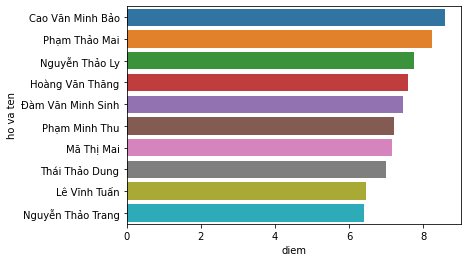

In [30]:
sns.barplot(data = sample, x='diem', y ='hoten')
plt.ylabel("ho va ten");